# Topical Lectures April 2021
## Drone control, part 4b: test flight (non-interactive)
Andreas Freise, Bas Swinkels 13.04.2021

In the 4th and last part of the project we provide two alternative notebooks, one which uses interactive plotting and one which uses non-interactive plotting. If you can we suggest that you use the one with interactive plots (4a) first.

In this notebook, we will try to fly our drone, using the controls we developped in the previous notebooks. To make it a bit more fun, we pose the following challenge: fly your drone through a set of predefined markers and report the time. We will compare the best times at the end of the project.

This is an alternative verison of the notebook in which we don't use interactive mode but a preprogrammed set of controls to race our drone.


In [1]:
from  tqdm.notebook import tqdm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import module
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# inline plots again
%matplotlib inline

# Don't forget to set the name string to your own name
MyName = "Joran"

Again copy the feedback functions from previous notebooks here:

In [3]:
# Enter the functions for the drone feedback here
# we apply the drone parameters found in the system identification task
V_left_offset = -0.011250000000001564
V_hover = 0.5056685561853952
V_max = 5.130825001742341
V_min = -5


# This function take voltages for the left and right rotor and applies the previously 
# measured parameters for corrections such that for V_left-V_right=0 we have a 
# balanced and hovering drone.
# Note that the naive clipping of the feedback signal at V_min and V_max might not
# be the best solution for more advanced control loops, but it should work for now.
def set_v(drone, _V_left, _V_right):
    V_left =  np.clip(V_hover + _V_left + V_left_offset, V_min, V_max)
    V_right = np.clip(V_hover + _V_right, V_min, V_max)
    drone.set_V(V_left, V_right)
def zphi2V(fb_z, fb_phi):
    V_left = fb_z + fb_phi
    V_right = fb_z - fb_phi
    return V_left, V_right
def set_v_nohover(drone, _V_left, _V_right):
    V_left =  np.clip(_V_left + V_left_offset, V_min, V_max)
    V_right = np.clip(_V_right, V_min, V_max)
    drone.set_V(V_left, V_right)

## Racing your drone

Again, to test our new control loops we are going to race our drone through a simple track. The goal is to reach a pre-defined set of targets as quickly as possible. 

Below we provide some code that allows interacting with the drone similar to notebooks 2 and 3. 

/home/joran/miniconda3/envs/strax/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


p phi:   0%|          | 0/2 [00:00<?, ?it/s]

d phi:   0%|          | 0/2 [00:00<?, ?it/s]

p y:   0%|          | 0/2 [00:00<?, ?it/s]

d y:   0%|          | 0/2 [00:00<?, ?it/s]

d i:   0%|          | 0/3 [00:00<?, ?it/s]

p z:   0%|          | 0/3 [00:00<?, ?it/s]

d z:   0%|          | 0/3 [00:00<?, ?it/s]

i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -4 1.1 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

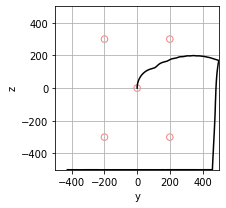

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 1.1 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

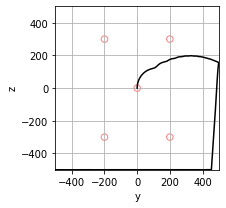

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 1.1 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

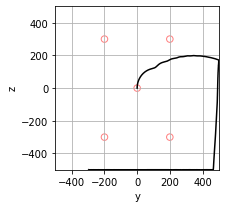

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 1.1 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

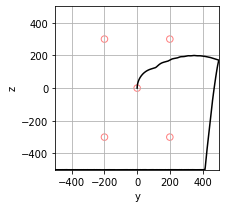

Total time: 200.00 out of 200.00 seconds
-------------------


i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -4 1 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

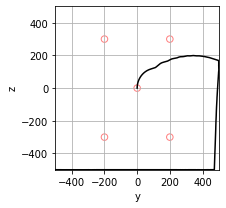

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 1 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

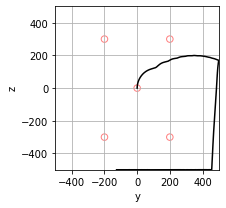

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 1 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

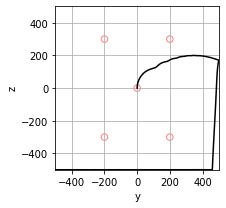

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 1 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

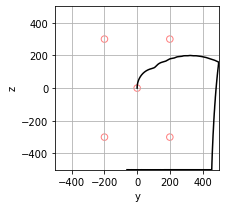

Total time: 200.00 out of 200.00 seconds
-------------------


i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -4 0.7 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

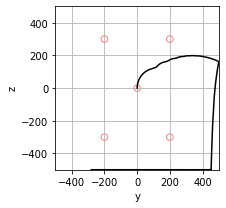

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 0.7 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

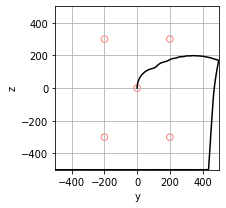

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 0.7 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

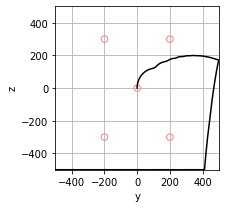

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -4 0.7 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

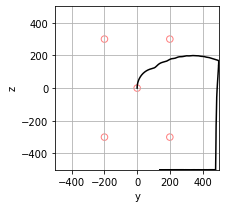

Total time: 200.00 out of 200.00 seconds
-------------------


d z:   0%|          | 0/3 [00:00<?, ?it/s]

i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -2 1.1 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

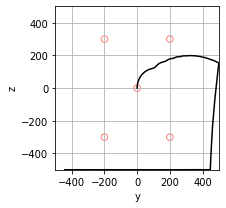

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 1.1 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

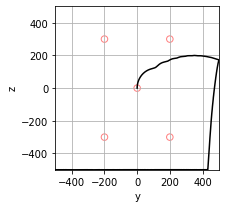

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 1.1 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

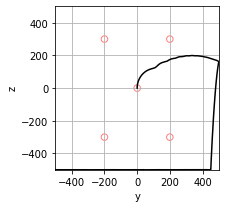

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 1.1 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

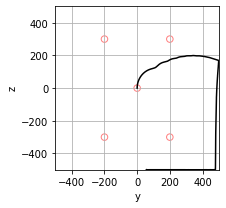

Total time: 200.00 out of 200.00 seconds
-------------------


i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -2 1 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

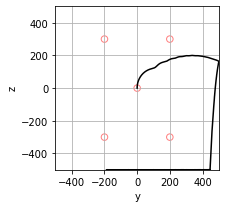

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 1 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

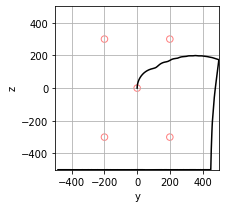

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 1 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

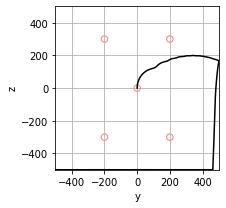

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 1 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

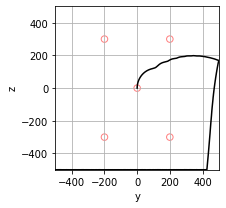

Total time: 200.00 out of 200.00 seconds
-------------------


i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -2 0.7 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

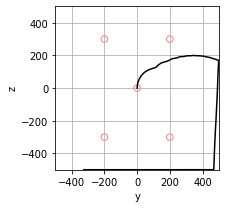

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 0.7 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

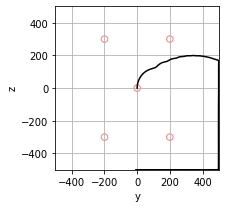

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 0.7 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

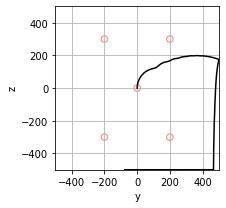

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -2 0.7 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

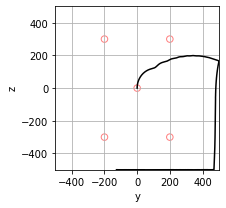

Total time: 200.00 out of 200.00 seconds
-------------------


d z:   0%|          | 0/3 [00:00<?, ?it/s]

i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -0.5 1.1 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

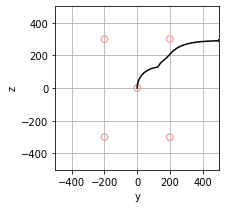

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 1.1 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

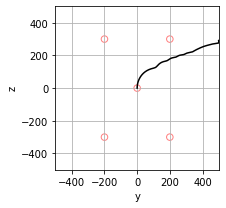

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 1.1 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

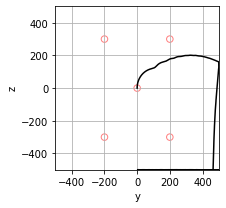

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 1.1 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

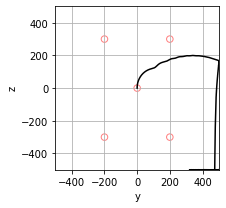

Total time: 200.00 out of 200.00 seconds
-------------------


i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -0.5 1 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

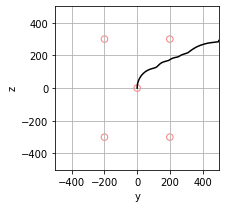

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 1 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

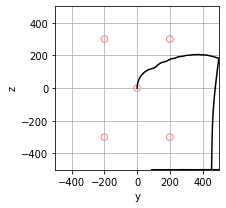

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 1 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

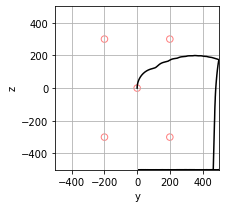

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 1 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

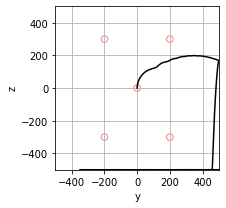

Total time: 200.00 out of 200.00 seconds
-------------------


i z:   0%|          | 0/4 [00:00<?, ?it/s]

-10 2 1.5 1.9 0.1 -0.5 0.7 -0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

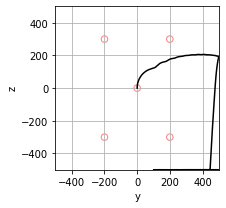

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 0.7 0


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

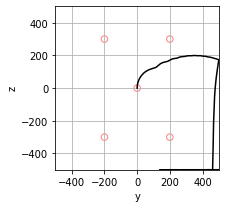

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 0.7 0.1


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

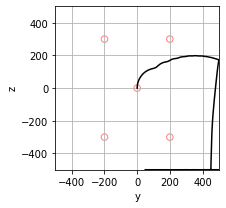

Total time: 200.00 out of 200.00 seconds
-------------------
-10 2 1.5 1.9 0.1 -0.5 0.7 0.2


/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:453: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_int = np.vectorize(np.int)
/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; 

KeyboardInterrupt: 

In [8]:
for PPHI in tqdm([-10,-5], desc = 'p phi'):
    for DPHI in tqdm([2, 4], desc = 'd phi'):
        for PY in tqdm([1.5, 2], desc = 'p y'):
            for DY in tqdm([1.9, 2.1], desc = 'd y'):
                for IY in tqdm([0.1,0.2,0.3], desc = 'd i'):
                    for PZ in tqdm([-4, -2, -0.5], desc = 'p z'):
                        for DZ in tqdm([1.1, 1 ,0.7], desc = 'd z'):
                            for IZ in tqdm([-0.1, 0, 0.1, 0.2], desc = 'i z'):
                                print(PPHI, DPHI, PY, DY, DI, PZ, DZ, IZ)
                                # vertical feedback loop
                                def z_PID_feedback(z, dz, z0, z_fb):
                                    # z: z position of drone
                                    # dz: z velocity of drone
                                    # z0 : set point
                                    # z_fb: previously returned feedback
                                    p =  PZ #-2
                                    d =  DZ #1
                                    i = IZ #0.9  # integrator gain
                                    fb = (z-z0) * p - d * dz + i*z_fb
                                    return fb

                                # phi faster than y!!
                                def phi_damped_feedback(phi, dphi, phi0):
                                    p =  PPHI #10
                                    d =  DPHI # 4

                                    fb = (phi-phi0) * p + d * dphi
                                    return fb


                                def y_PID_feedback(y, dy, y0, y_fb):
                                    p = PY# 2
                                    d = DY#1.9
                                    i = IY # 0.2
                                    fb = (y-y0) * p + d * dy + i * y_fb
                                    # we limit the tilt the drone no more that +-0.2 pi
                                    fb = np.clip(fb, -0.2*np.pi, 0.2*np.pi)
                                    return fb

                                drone = module.Drone(name=MyName, wind=True)
                                # Defining the track as an array of targets [y,z,radius].
                                # The targets have to be reached in the given order.
                                targets = np.array([
                                    [ 200,  300, 10],
                                    [ 200, -300, 10],
                                    [-200, -300, 10],
                                    [-200,  300, 10],
                                    [0,0,10]
                                ])

                                # Setting the targets
                                drone.set_targets(targets)

                                # Runnding for 200 seconds
                                N = 200*60
                                Nidx = N-1
                                results = np.zeros([N,14])
                                V_left=V_right=0
                                set_v(drone,V_left,V_right)
                                z_fb = 0
                                y_fb = 0 
                                phi_fb = 0
                                broken = False
                                for i in range(N):
                                    results[i,0:12] = drone.update()
                                    results[i,12:14] = [V_left,V_right]
                                    z = results[i,2]
                                    dz = results[i,5]
                                    y = results[i,1]
                                    if (np.abs(y)-500 >-1)  | (np.abs(z)-500 >-1):
                                        broken = True
#                                         print('broken')
#                                         break
                                    dy = results[i,4]
                                    phi = results[i,3]
                                    dphi = results[i,6]

                                    # Setting the set point as the current target positon 
                                    idx = drone.target_idx
                                    # stop if we have reached all targets
                                    if idx == drone.num_targets:
                                        Nidx = i
                                        break
                                    y0 = targets[idx,0]
                                    z0 = targets[idx,1]

                                    # ----------------------------------------------------
                                    y_fb  = y_PID_feedback(y, dy, y0, y_fb)
                                    phi_fb = phi_damped_feedback(phi, dphi, y_fb)
                                    z_fb = z_PID_feedback(z, dz, z0, z_fb)

                                    # ----------------------------------------------------

                                    # applying feedback
                                    V_left, V_right = zphi2V(z_fb, phi_fb)

                                    # ----------------------------------------------------
                                    # Change the below to your set_v function (which you
                                    # used to develop the feedback loops)
                                    set_v_nohover(drone,V_left, V_right)
                                    # ----------------------------------------------------
#                                 if broken:
#                                     break
                                #Plotting the reuslts

                                start=0
                                t = results[start:,0]
                                y = results[start:,1]
                                z = results[start:,2]
                                phi = results[start:,3]
                                dphi = results[start:,6]
                                fig, ax = plt.subplots(1, figsize=(5,3))
                                for _t in targets:
                                    patch = plt.Circle((_t[0],_t[1]),2*_t[2], lw=1, color='red', alpha=0.5, fill=False)
                                    ax.add_patch(patch)
                                plt.plot(y,z, 'k')
                                ax.set_xlabel("y")
                                ax.set_ylabel("z")
                                ax.set_xlim(-500,500)
                                ax.set_ylim(-500,500)
                                ax.set_aspect('equal')
                                plt.grid()
                                #plt.legend()
                                plt.tight_layout()
                                plt.show()
                                t_end = results[Nidx,0]

                                print(f"Total time: {t_end:.2f} out of {N/60.0:.2f} seconds")
                                if t_end < 200:
                                    break
                                print('-------------------')

In [5]:
k


/home/joran/miniconda3/envs/strax/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


432

In [4]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [30]:
PPHI, DPHI,  IY  = -10, 4, 2
PY, DY = 1.9, 0.6
PZ, DZ, IZ = -10, 2, 0.2

-10 4 1.9 0.6 2 -10 2 0.2


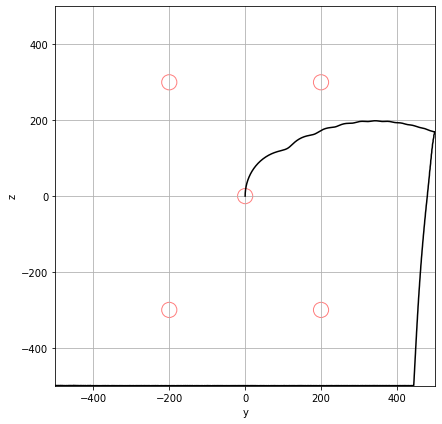

Total time: 200.00 out of 200.00 seconds
-------------------


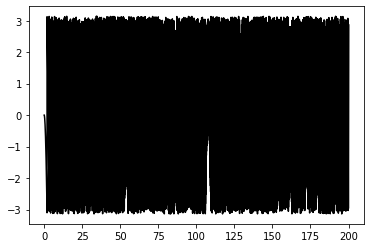

In [31]:
print(PPHI, DPHI, PY, DY, IY, PZ, DZ, IZ)
# vertical feedback loop
def z_PID_feedback(z, dz, z0, z_fb):
    # z: z position of drone
    # dz: z velocity of drone
    # z0 : set point
    # z_fb: previously returned feedback
    p =  PZ #-2
    d =  DZ #1
    i = IZ #0.9  # integrator gain
    fb = (z-z0) * p - d * dz + i*z_fb
    return fb

# phi faster than y!!
def phi_damped_feedback(phi, dphi, phi0):
    p =  PPHI #10
    d =  DPHI # 4

    fb = (phi-phi0) * p + d * dphi
    return fb


def y_PID_feedback(y, dy, y0, y_fb):
    p = PY# 2
    d = DY#1.9
    i = IY # 0.2
    fb = (y-y0) * p + d * dy + i * y_fb
    # we limit the tilt the drone no more that +-0.2 pi
    fb = np.clip(fb, -0.2*np.pi, 0.2*np.pi)
    return fb

drone = module.Drone(name=MyName, wind=True)
# Defining the track as an array of targets [y,z,radius].
# The targets have to be reached in the given order.
targets = np.array([
    [ 200,  300, 10],
    [ 200, -300, 10],
    [-200, -300, 10],
    [-200,  300, 10],
    [0,0,10]
])

# Setting the targets
drone.set_targets(targets)

# Runnding for 200 seconds
N = 200*60
Nidx = N-1
results = np.zeros([N,14])
V_left=V_right=0
set_v(drone,V_left,V_right)
z_fb = 0
y_fb = 0 
phi_fb = 0

for i in range(N):
    results[i,0:12] = drone.update()
    results[i,12:14] = [V_left,V_right]
    z = results[i,2]
    dz = results[i,5]
    y = results[i,1]
    dy = results[i,4]
    phi = results[i,3]
    dphi = results[i,6]

    # Setting the set point as the current target positon 
    idx = drone.target_idx
    # stop if we have reached all targets
    if idx == drone.num_targets:
        Nidx = i
        break
    y0 = targets[idx,0]
    z0 = targets[idx,1]

    # ----------------------------------------------------
    y_fb  = y_PID_feedback(y, dy, y0, y_fb)
    phi_fb = phi_damped_feedback(phi, dphi, y_fb)
    z_fb = z_PID_feedback(z, dz, z0, z_fb)

    # ----------------------------------------------------

    # applying feedback
    V_left, V_right = zphi2V(z_fb, phi_fb)

    # ----------------------------------------------------
    # Change the below to your set_v function (which you
    # used to develop the feedback loops)
    set_v_nohover(drone,V_left, V_right)
    # ----------------------------------------------------

#Plotting the reuslts
if True:
    start=0
    t = results[start:,0]
    y = results[start:,1]
    z = results[start:,2]
    phi = results[start:,3]
    dphi = results[start:,6]
    fig, ax = plt.subplots(1, figsize=(12,6))
    for _t in targets:
        patch = plt.Circle((_t[0],_t[1]),2*_t[2], lw=1, color='red', alpha=0.5, fill=False)
        ax.add_patch(patch)
    plt.plot(y,z, 'k')
    ax.set_xlabel("y")
    ax.set_ylabel("z")
    ax.set_xlim(-500,500)
    ax.set_ylim(-500,500)
    ax.set_aspect('equal')
    plt.grid()
    #plt.legend()
    plt.tight_layout()
    plt.show()
    plt.plot(t,phi, 'k')
    t_end = results[Nidx,0]

print(f"Total time: {t_end:.2f} out of {N/60.0:.2f} seconds")
if t_end < 201:
    pass
print('-------------------')

In [13]:
PPHI, DPHI, PY, DY, DI, PZ, DZ, IZ

NameError: name 'DI' is not defined